# k-Nearest Neighbors
__MATH 3480__ - Dr. Michael Olson

Reading:

[Machine Learning Landscape](https://raw.githubusercontent.com/drolsonmi/math3480/main/Notes/Images/3480_05_ML_Landscape.png)

## The Concept behing k-Nearest Neighbors
The k-Nearest Neighbors (KNN) algorithm takes a point and gives it a classification based on the characteristics of points near it.
* Example: Cats have sharper claws and shorter ears, dogs have less sharp claws and longer ears
    * Graph this on the board, then add another unknown point 

The value of $k$ tells KNN to look at the $k$ nearest points.
* Count the number of neighbors with each category
* The category with the highest count becomes the classification of our point in question

### Potential Problems/Questions
As $k$ changes, it could change the result. How do we know what value of $k$ to use? This is kind of arbitrary, but we generally use the following rule:
$$k = \sqrt{n}$$

What if the number of points around my point is split evenly between groups?
* If $k$ is even, we could be equally balanced between two categories
* If $k$ is a multiple of the number of groups to classify, we could be equally balanced between all categories
* Put it all together $\to$ choose a prime $k$ near $\sqrt{n}$

How do we determine the distance? We have many different distance measures:
* Manhattan distance (L1-norm)
* Euclidean distance (L2-norm)
* L- $\infty$ norm 
* Cosine distance
* Jaccard distance (if we are dealing with categorical variables)

The standard (default) option is generally the euclidean distance. The distance between your new datapoint ($x$) and any other point ($x_i$) would be,
  * For 2 variables: $d = \sqrt{(x_0-x_{i0})^2 + (x_1-x_{i1})^2}$
  * For 3 variables: $d = \sqrt{(x_0-x_{i0})^2 + (x_1-x_{i1})^2 + (x_2-x_{i2})^2}$
  * For 4 variables: $d = \sqrt{(x_0-x_{i0})^2 + (x_1-x_{i1})^2 + (x_2-x_{i2})^2 + (x_3-x_{i3})^2}$
  * etc.

-----
## Random Dataset

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(n_features=2, n_classes=3, random_state=0)

print(X[:10])
print(y[:10])   

[[-0.09845252 -0.66347829]
 [ 1.8831507  -1.34775906]
 [-0.90729836  0.0519454 ]
 [ 1.92294203  1.48051479]
 [-1.17312341  1.94362119]
 [ 0.1666735   0.63503144]
 [ 0.94942081  0.08755124]
 [ 1.12663592 -1.07993151]
 [-0.74475482 -0.82643854]
 [-0.67246045 -0.35955316]]
[0 2 0 2 2 0 0 2 1 0]


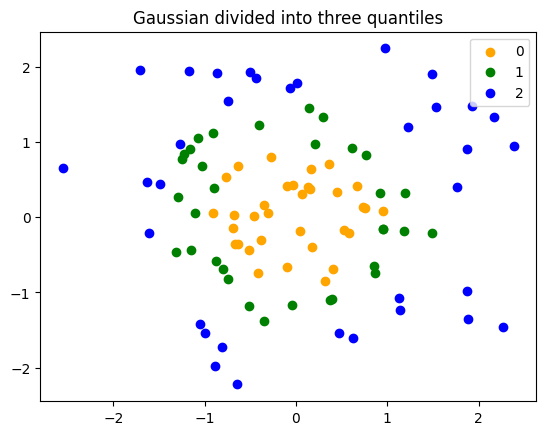

In [2]:
for grp,color in zip([0,1,2],['orange','green','blue']):
    X_grp = X[y==grp]
    plt.scatter(X_grp[:, 0], X_grp[:, 1], c=color, label=grp)

plt.title("Gaussian divided into three quantiles")
plt.legend()
plt.show()

In [13]:
# Create the model 

from sklearn.neighbors import KNeighborsClassifier

k = 11

knn_class = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_class.fit(X,y)

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [ ]:
# Test the model

x_test = np.array([[0.7,-0.5],
                   [0.5,0.5],
                   [-1.3,0.7],
                   [-1,-1.4]])

y_test = knn_class.predict(x_test)

print(y_test)

[0 0 1 1]


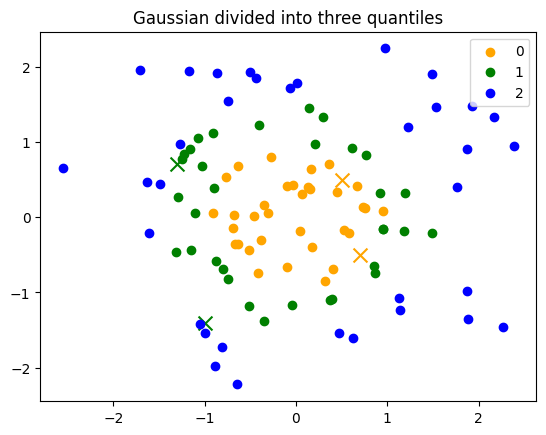

In [15]:
for grp,color in zip([0,1,2],['orange','green','blue']):
    X_grp = X[y==grp]
    plt.scatter(X_grp[:, 0], X_grp[:, 1], c=color, label=grp)
    x_test_grp = x_test[y_test==grp]
    plt.scatter(x_test_grp[:, 0], x_test_grp[:, 1], c=color, marker='x', s=100)

plt.title("Gaussian divided into three quantiles")
plt.legend()
plt.show()

-----
## kNN as a Regressor


The kNN model can be used as a regressor as well to predict the value of a point. For your point $x$, it will predict $\hat{y}$ to be the average of the $y$ values of the nearest $k$ points.
$$\hat{y} = \frac{1}{k}\sum_{j=1}^k y_j$$

[[6.53010140e-01]
 [5.10866893e-01]
 [3.62308384e+00]
 [5.72203589e+00]
 [5.88673149e+00]
 [1.08693972e+00]
 [4.08454345e+00]
 [5.84604802e+00]
 [7.77405079e+00]
 [4.62137506e-03]]
[[6.53010140e-01 5.10866893e-01 3.62308384e+00 5.72203589e+00
  5.88673149e+00 1.08693972e+00 4.08454345e+00 5.84604802e+00
  7.77405079e+00 4.62137506e-03]]


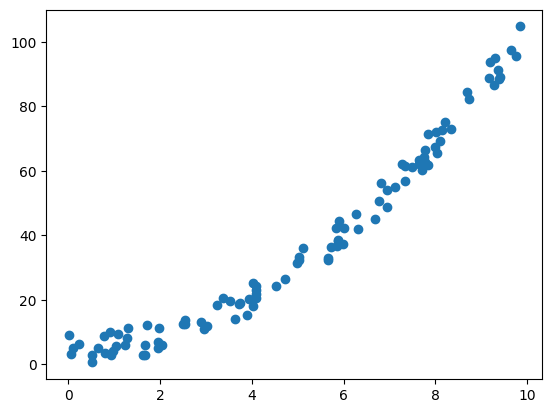

In [16]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100,2)*10
x = X[:,0]
y = X[:,1] + x**2

plt.scatter(x,y)
print(x[:10].reshape(-1,1))
print(x[:10].reshape(1,-1))

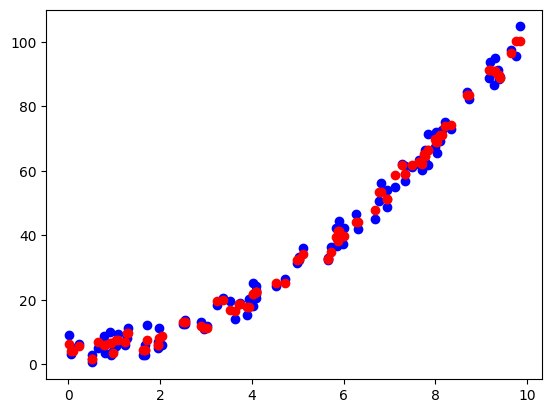

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x.reshape(-1, 1),y)

y_pred = knr.predict(x.reshape(-1, 1))

plt.scatter(x,y, c='blue')
plt.scatter(x,y_pred, c='red')

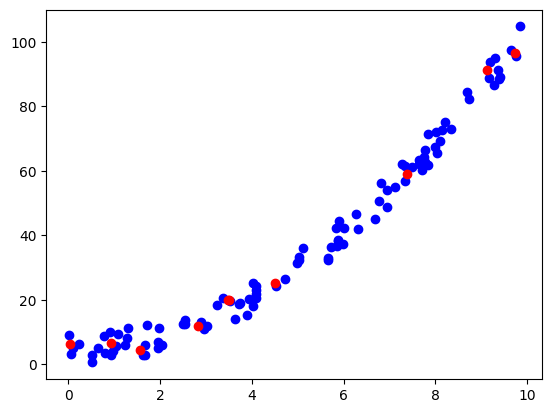

In [18]:
x_test = np.random.rand(10)*10
y_test = knr.predict(x_test.reshape(-1,1))


plt.scatter(x,y, c='blue')
plt.scatter(x_test,y_test, c='red')

-----
## Iris Flower Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
print(iris['feature_names'])
print(iris['data'][:10,:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [4]:
print(iris['target_names'])
print(iris['target'])

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


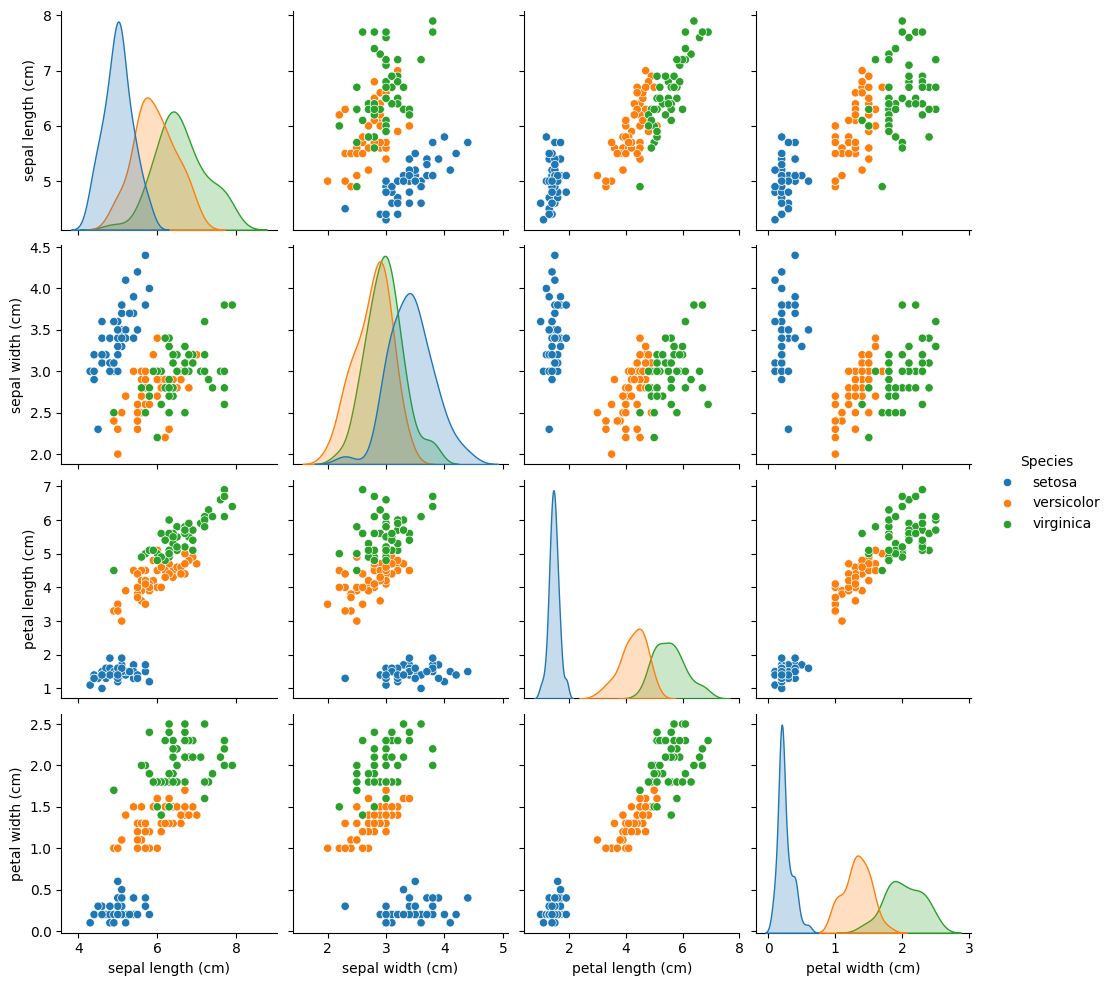

In [5]:
import seaborn as sns
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

def species_name(x):
    return iris['target_names'][x]

iris_df['Species'] = pd.Series(iris['target']).apply(species_name)
display(iris_df)

sns.pairplot(iris_df, hue='Species')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

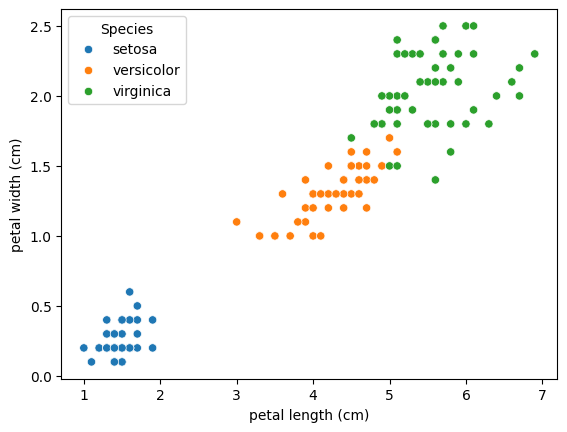

In [6]:
sns.scatterplot(iris_df,
                x='petal length (cm)',
                y='petal width (cm)',
                hue='Species')

Text(0.5, 0, 'Petal Width (cm)')

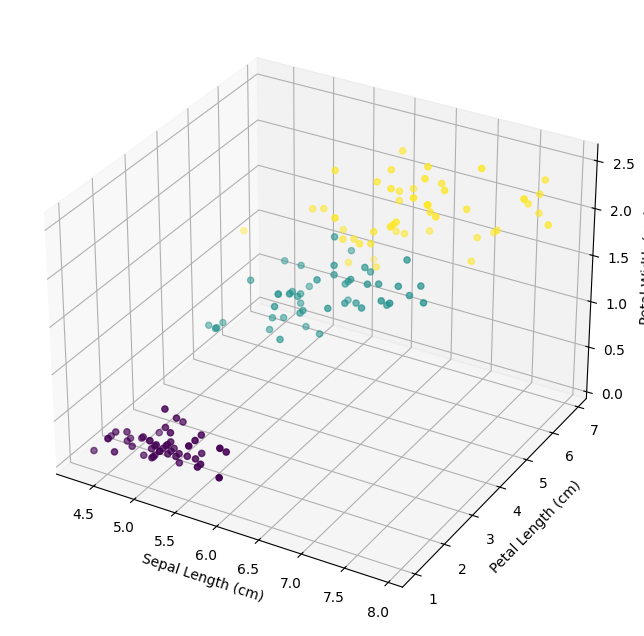

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(iris['data'][:,0],
                iris['data'][:,2],
                iris['data'][:,3],
                c=iris['target'])
          
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')

## Preprocessing
1. Missing Data - No missing values in this example
2. Encode Categorical Variables - Using original data, no categorical variables
3. Split the data
4. Feature Scaling

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'],
                                                    iris['target'],
                                                    test_size=0.20,
                                                    random_state=61)

In [22]:
from sklearn.preprocessing import StandardScaler # or use MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:,0],
           X_train[:,2],
           X_train[:,3],
           c=y_train)
          
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')

## The KNN model

In [ ]:
k = np.sqrt(len(X_train))
print(k)
print(np.floor(k), np.ceil(k))

if (np.floor(k) % 2) == 0:
    k = int(np.ceil(k))
else:
    k = int(np.floor(k))

print(k)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_class = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')
knn_class.fit(X_train,y_train)

In [36]:
y_pred = knn_class.predict(X_test)

## Evaluate the model

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
fig = plt.figure(figsize=(8,16))

ax1 = fig.add_subplot(121, projection='3d')

ax1.scatter(X_test[:,0],
           X_test[:,2],
           X_test[:,3],
           c=y_test)
          
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_zlabel('Petal Width (cm)')

ax2 = fig.add_subplot(122, projection='3d')

ax2.scatter(X_test[:,0],
           X_test[:,2],
           X_test[:,3],
           c=y_pred)
          
ax2.set_xlabel('Sepal Length (cm)')
ax2.set_ylabel('Petal Length (cm)')
ax2.set_zlabel('Petal Width (cm)')

plt.show()